In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
%matplotlib inline

In [32]:
#Importing the DataSets
df = pd.read_csv('weatherHistory.csv')

In [47]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


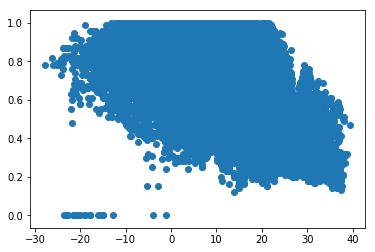

In [50]:
#Is there a relationship between humidity and temperature? 
#What about between humidity and apparent temperature? 
#Can you predict the apparent temperature given the humidity or vice versa?

plt.scatter(df['Apparent Temperature (C)'], df['Humidity'])
plt.show()

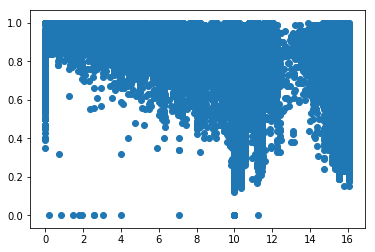

In [40]:
plt.scatter(df['Visibility (km)'], df['Humidity'])
plt.show()

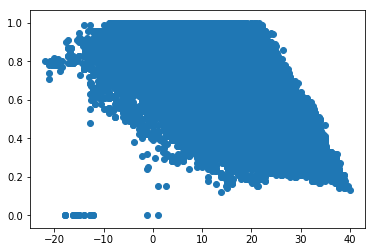

In [42]:
plt.scatter(df['Temperature (C)'], df['Humidity'])
plt.show()

In [83]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=50, weights='distance')

X = df[['Temperature (C)', 'Visibility (km)']]
y = df['Humidity']
knn_w.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='distance')

In [84]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn_w, X = X, y = y, cv = 10)
acc = pd.DataFrame()
acc['Accuracies'] = accuracies

score = cross_val_score(knn_w, X, y, cv = 10)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

acc.head()

Weighted Accuracy: 0.56 (+/- 0.11)


,Accuracies
0,0.516721
1,0.624868
2,0.587300
3,0.628170
4,0.536552


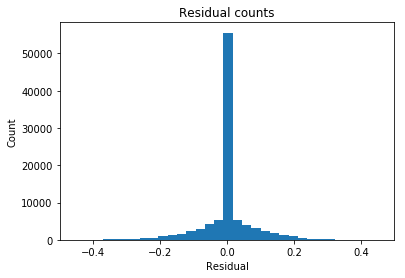

In [87]:
# Extract predicted values for new data set.
predicted = knn_w.predict(X).ravel()
actual = y.values

# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.reshape(-1,1)

plt.hist(residual, bins= 50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim(-0.5, 0.5)
plt.show()

In [68]:
import math
import warnings
from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [-0.01179076 -0.0066603 ]

Intercept: 
 0.944510557457803

R-squared:
0.41699977638173696


In [70]:
accuracies = cross_val_score(estimator = regr, X = X, y = y, cv = 10)
acc = pd.DataFrame()
acc['Accuracies'] = accuracies

score = cross_val_score(regr, X, y, cv = 10)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

acc.head()

Weighted Accuracy: 0.40 (+/- 0.12)


,Accuracies
0,0.323321
1,0.511701
2,0.374933
3,0.449798
4,0.301111


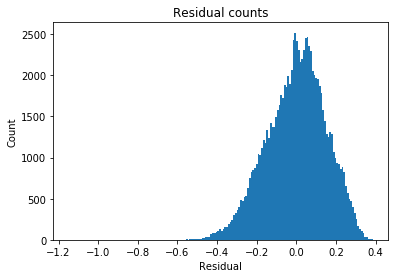

In [71]:
# Extract predicted values for new data set.
predicted = regr.predict(X).ravel()
actual = y.values

# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.reshape(-1,1)

plt.hist(residual, bins= "auto")
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
#plt.xlim(-200, 200)
plt.show()

It appears that kNN works better in this case to predict humidity using temperature and visibility